<a href="https://colab.research.google.com/github/anikarajvanshi20/Projects_Portfolio/blob/main/Machine_Learning/Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Train a Logistic Regression Classifier to Predict Passenger Survival on the Titanic Dataset

You are provided with code to download and load the Titanic dataset in CSV format.

In the dataset, each row contains information about a Titanic passenger — such as their name, gender, class, etc. (See the dataframe preview below for more details.)

The target column is **'Survived'**, which indicates whether a passenger survived or not.

You may use any of the other columns as input features (feel free to drop any columns you believe are not useful).

Your task is to train a logistic regression model that takes these input features (make sure not to accidentally include the 'Survived' column as an input) and predicts whether a passenger with those features would survive.

Use an 80:20 split for training and testing.

Be sure to focus on code quality and include a method to evaluate how well your model performs on **testing data**.

**Bonus:** Try to identify which feature(s) most strongly influence a passenger’s likelihood of survival.


In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown

clear_output()

In [ ]:
# Install the opendatasets library
%pip install opendatasets -qq

clear_output()


## NOTE: You'll be asked to insert your 'Kaggle-username' and 'key'.
 To get your `Kaggle username` and `key`:
 1. Go to **Kaggle.com**,
 2. log in (or create a new account if you haven't),
 3. click on your **profile picture**, then "**Account**".
 4. Scroll down to the "**API**" section and click "**Create New API Token**".
 5. This will download a **kaggle.json** file containing your `username` and `key`.
 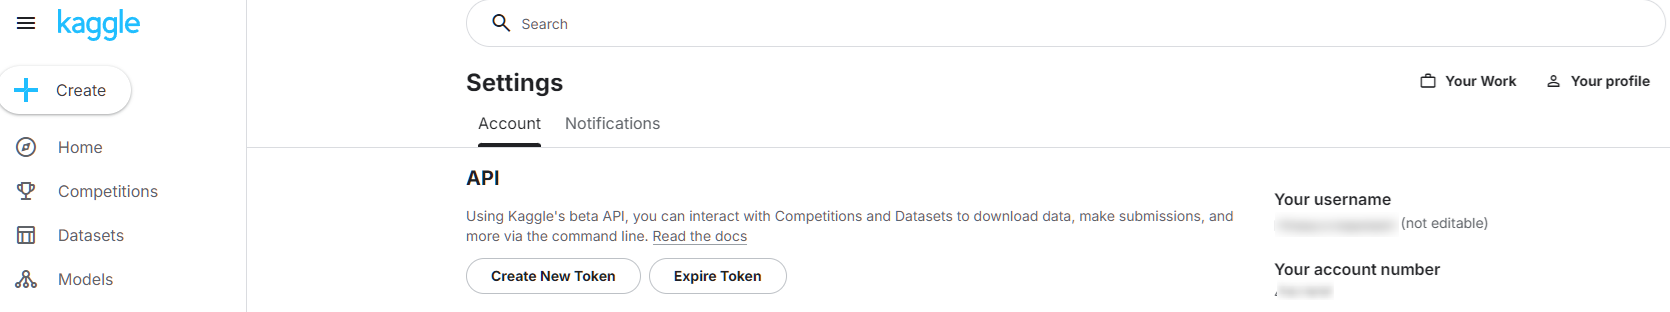



In [ ]:
import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Skipping, found downloaded files in "./titanic-dataset" (use force=True to force download)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_data = pd.read_csv('titanic-dataset/Titanic-Dataset.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

In [ ]:
data_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# Droping irrelevant columns
data_x = titanic_data.drop(columns=['Survived','Ticket','Name','PassengerId'])

# Create a new feature 'Cabin_Known'
data_x['Cabin_Known'] = data_x['Cabin'].notna()
data_x.drop(columns=['Cabin'], inplace=True)
data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known
0,3,male,22.0,1,0,7.2500,S,False
1,1,female,38.0,1,0,71.2833,C,True
2,3,female,26.0,0,0,7.9250,S,False
3,1,female,35.0,1,0,53.1000,S,True
4,3,male,35.0,0,0,8.0500,S,False
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,False
887,1,female,19.0,0,0,30.0000,S,True
888,3,female,NaN,1,2,23.4500,S,False
889,1,male,26.0,0,0,30.0000,C,True


In [ ]:
# Checking for missing values
missing_values = data_x.isnull().sum()
print("Missing values per column in data_x:")
print(missing_values)
print(data_x.shape)
print(data_y.shape)

Missing values per column in data_x:
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Cabin_Known      0
dtype: int64
(891, 8)
(891,)


In [ ]:
# Filling missing values
data_x['Age'].fillna(data_x['Age'].median(), inplace=True)
data_x['Embarked'].fillna(data_x['Embarked'].mode()[0], inplace=True)

# Converting columns to numerical using one-hot encoding
categorical_cols = ['Sex', 'Embarked']
data_x = pd.get_dummies(data_x, columns=categorical_cols, drop_first=True)
data_x

print("Missing values per column in data_x after handling:")
print(data_x.isnull().sum())
print("\nShape of data_x:")
print(data_x.shape)
print("\nShape of data_y:")
print(data_y.shape)

Missing values per column in data_x after handling:
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin_Known    0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

Shape of data_x:
(891, 9)

Shape of data_y:
(891,)


/tmp/ipython-input-13-1761791273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_x['Age'].fillna(data_x['Age'].median(), inplace=True)
/tmp/ipython-input-13-1761791273.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
#Spliting the train and test data
import sklearn
from sklearn.model_selection import train_test_split
x = data_x
y = data_y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Running the Logistic Regression model
model_sklearn = LogisticRegression(max_iter=1000)

# Training the model using the train dataset
model_sklearn.fit(x_train_scaled, y_train)

# Predicting labels and testing accuracy
y_pred = model_sklearn.predict(x_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred)

# Count the number of correctly classified points
correct_mask = (y_pred == y_test)
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')
print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100:.2f}%)')

The model predicted 147 out of 179 predictions correctly
The Accuracy is 0.8212290502793296 (82.12%)


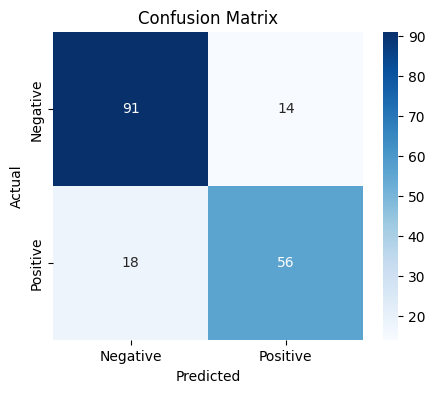

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Identify feature importance based on logistic regression coefficients
# The coefficients represent the change in the log-odds of the outcome for a one-unit increase in the feature
coefficients = model_sklearn.coef_[0]
feature_names = x_train.columns
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the feature importance by absolute value to find the strongest effects
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

print("Feature Importance (Absolute Coefficient Values):")
print(sorted_feature_importance)
print("\nFeature Coefficients (Magnitude and Direction):")
print(feature_importance.sort_values(key=abs, ascending=False))

Feature Importance (Absolute Coefficient Values):
Sex_male       1.284091
Pclass         0.601412
Age            0.400522
SibSp          0.347288
Cabin_Known    0.280652
Embarked_S     0.191175
Parch          0.106253
Fare           0.091647
Embarked_Q     0.058699
dtype: float64

Feature Coefficients (Magnitude and Direction):
Sex_male      -1.284091
Pclass        -0.601412
Age           -0.400522
SibSp         -0.347288
Cabin_Known    0.280652
Embarked_S    -0.191175
Parch         -0.106253
Fare           0.091647
Embarked_Q    -0.058699
dtype: float64


**From the Tutorial Feedback**



*   Cabin was added as a feature
*   Embarked was one-hot encoded
*   The missing area was filled in instead of being dropped
*   The overall Model accuracy increased from 79% to 82%




